Autoreload magic

In [1]:
%load_ext autoreload
%autoreload 2

import warnings

warnings.filterwarnings('ignore')

Set sys and import data sampler

In [2]:
import sys

import tensorflow as tf

sys.path.append('/Users/tmo/Nodes/bandits/')

DATA_PATH = '/Users/tmo/Data/bandits/'

from src.sample_jester_data import sample_jester_data
from src.run_bandit import plot_model_actions, run_bandit
from src.linear_full_posterior_sampling import LinearFullPosteriorSampling
from src.neural_linear_sampling import NeuralLinearPosteriorSampling

Sample data

In [3]:
dataset, opt_rewards, opt_actions, num_actions, context_dim = sample_jester_data(DATA_PATH+'jester/jester_data_40jokes_19181users.npy', 
                                                                                 num_contexts=2000,
                                                                                 pct_zero=0,
                                                                                 shuffle_rows=False,
                                                                                 shuffle_cols=False)

In [4]:
dataset

array([[ 7.82,  1.12, -8.4 , ...,  4.95,  8.3 , -9.85],
       [ 4.71,  7.57,  3.4 , ...,  0.73,  1.12,  3.3 ],
       [ 3.93,  2.91, -8.3 , ...,  6.65,  7.28, -3.64],
       ...,
       [ 7.82,  5.24,  5.78, ..., -9.76,  7.04, -9.08],
       [ 6.46, -1.89, -1.12, ...,  6.21,  8.74, -1.89],
       [ 8.01, -7.43,  3.69, ...,  7.52,  0.53,  4.13]])

Set parameters for the two test models

In [5]:
hparams_linear = tf.contrib.training.HParams(num_actions=num_actions, 
                                             context_dim=context_dim, 
                                             a0=6,
                                             b0=6,
                                             lambda_prior=0.25,
                                             initial_pulls=2)

linear_bandit = LinearFullPosteriorSampling(name='linear_bandit', hparams=hparams_linear)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [6]:
hparams_nlinear = tf.contrib.training.HParams(num_actions=num_actions,
                                                context_dim=context_dim,
                                                init_scale=0.3,
                                                activation=tf.nn.relu,
                                                layer_sizes=[50],
                                                batch_size=512,
                                                activate_decay=True,
                                                initial_lr=0.1,
                                                max_grad_norm=5.0,
                                                show_training=False,
                                                freq_summary=1000,
                                                buffer_s=-1,
                                                initial_pulls=2,
                                                reset_lr=True,
                                                lr_decay_rate=0.5,
                                                training_freq=1,
                                                training_freq_network=50,
                                                training_epochs=100,
                                                a0=6,
                                                b0=6,
                                                lambda_prior=0.25,
                                                verbose=False)

neural_bandit = NeuralLinearPosteriorSampling('neural_bandit', hparams_nlinear)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Ran 500 iterations in 8.512924194335938 seconds


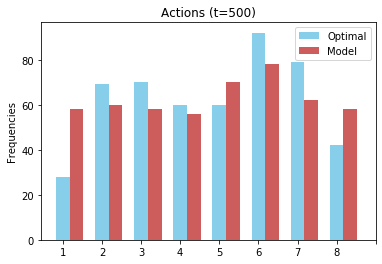

In [7]:
neural_bandit = NeuralLinearPosteriorSampling('neural_bandit', hparams_nlinear)

oaf, maf, rewards, actions = run_bandit(model=neural_bandit, hparams=hparams_nlinear, num_contexts=500, pct_zero=0.0, plot=True)

In [11]:
from collections import Counter

In [15]:
Counter(actions).values()

dict_values([58, 60, 58, 56, 70, 78, 62, 58])

In [13]:
maf

array([58, 60, 58, 56, 70, 78, 62, 58])

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
def grid_search():

    zero_range = np.logspace(0.8, 0.99, 10)/10

    chi_score = []
    reward = []
    optimal_choice_frequency = []
    model_action_frequency = []
    
    for i in zero_range:
        
        neural_bandit = NeuralLinearPosteriorSampling('neural_bandit', hparams_nlinear)
        
        oaf, maf, mr = run_bandit(model=neural_bandit, hparams=hparams_nlinear, num_contexts=500, pct_zero=i, plot=True)
        
        optimal_choice_frequency.append(oaf)
        model_action_frequency.append(maf)
        reward.append(mr)
        
    fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
        
    for idx, r in enumerate(reward):
        ax1.plot(np.cumsum(r), label = "{}%".format(round(zero_range[idx], 2)))
        
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
    return optimal_choice_frequency, model_action_frequency, reward

In [ ]:
loaf, lmaf, reward = grid_search()

In [ ]:
from scipy.stats import chisquare

In [ ]:
cs = []

for actions in loaf:
    cs.append(chisquare(actions[1:], f_exp=oaf[1:])[0])
    plot_model_actions(oaf, actions, 500)
    print(sum(actions[1:])/500, actions[0]/500)

In [ ]:
plt.plot(cs)

In [ ]:
loaf[9]